### Load Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Import Data

In [2]:
anime = pd.read_csv("anime.csv")

In [3]:
anime.head()

anime_id                title              title_english title_japanese  \
0     11013        Inu x Boku SS  Inu X Boku Secret Service         妖狐×僕SS   
1      2104     Seto no Hanayome      My Bride is a Mermaid          瀬戸の花嫁   
2      5262   Shugo Chara!! Doki         Shugo Chara!! Doki    しゅごキャラ！！どきっ   
3       721        Princess Tutu              Princess Tutu      プリンセスチュチュ   
4     12365  Bakuman. 3rd Season                   Bakuman.          バクマン。   

                                  title_synonyms  \
0                                Youko x Boku SS   
1                           The Inland Sea Bride   
2  Shugo Chara Ninenme, Shugo Chara! Second Year   
3                                            NaN   
4                               Bakuman Season 3   

                                           image_url type    source  episodes  \
0  https://myanimelist.cdn-dena.com/images/anime/...   TV     Manga        12   
1  https://myanimelist.cdn-dena.com/images/anime/...   TV     Manga        26   
2  https://myanimelist.cdn-dena.com/images/anime/...   TV     Manga        51   
3  https://myanimelist.cdn-dena.com/images/anime/...   TV  Original        38   
4  https://myanimelist.cdn-dena.com/images/anime/...   TV     Manga        25   

            status  ...           broadcast  \
0  Finished Airing  ...  Fridays at Unknown   
1  Finished Airing  ...             Unknown   
2  Finished Airing  ...             Unknown   
3  Finished Airing  ...  Fridays at Unknown   
4  Finished Airing  ...             Unknown   

                                             related  \
0  {'Adaptation': [{'mal_id': 17207, 'type': 'man...   
1  {'Adaptation': [{'mal_id': 759, 'type': 'manga...   
2  {'Adaptation': [{'mal_id': 101, 'type': 'manga...   
3  {'Adaptation': [{'mal_id': 1581, 'type': 'mang...   
4  {'Adaptation': [{'mal_id': 9711, 'type': 'mang...   

                                            producer          licensor  \
0  Aniplex, Square Enix, Mainichi Broadcasting Sy...  Sentai Filmworks   
1                  TV Tokyo, AIC, Square Enix, Sotsu        Funimation   
2                                    TV Tokyo, Sotsu               NaN   
3                 Memory-Tech, GANSIS, Marvelous AQL         ADV Films   
4                                      NHK, Shueisha               NaN   

             studio                                     genre  \
0  David Production    Comedy, Supernatural, Romance, Shounen   
1             Gonzo  Comedy, Parody, Romance, School, Shounen   
2         Satelight             Comedy, Magic, School, Shoujo   
3    Hal Film Maker    Comedy, Drama, Magic, Romance, Fantasy   
4         J.C.Staff           Comedy, Drama, Romance, Shounen   

                                       opening_theme  \
0                              ['"Nirvana" by MUCC']   
1                 ['"Romantic summer" by SUN&LUNAR']   
2  ['#1: "Minna no Tamago (みんなのたまご)" by Shugo Cha...   
3             ['"Morning Grace" by Ritsuko Okazaki']   
4  ['#1: "Moshimo no Hanashi (もしもの話)" by nano.RIP...   

                                        ending_theme  duration_min  \
0  ['#1: "Nirvana" by MUCC (eps 1, 11-12)', '#2: ...          24.0   
1  ['#1: "Ashita e no Hikari (明日への光)" by Asuka Hi...          24.0   
2  ['#1: "Rottara Rottara (ロッタラ ロッタラ)" by Buono! ...          24.0   
3  ['"Watashi No Ai Wa Chiisaikeredo" by Ritsuko ...          16.0   
4  ['#1: "Pride on Everyday" by Sphere (eps 1-13)...          24.0   

   aired_from_year  
0             2012  
1             2007  
2             2008  
3             2002  
4             2012  

[5 rows x 33 columns]

### Histogram to see data using pandas

<AxesSubplot:>

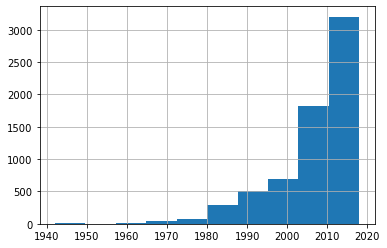

In [4]:
anime.aired_from_year.hist()

### Use seaborn for fitted curve

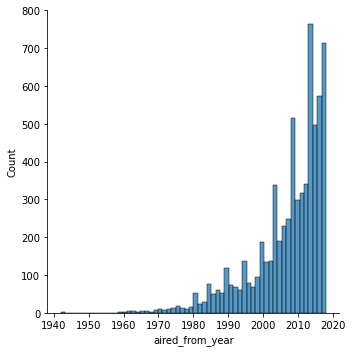

In [6]:
sns.displot(anime['aired_from_year'])

### Part 1: Transforming Positively Skewed Data

##### In order to transform positvely skewed data, use square root and log

<AxesSubplot:>

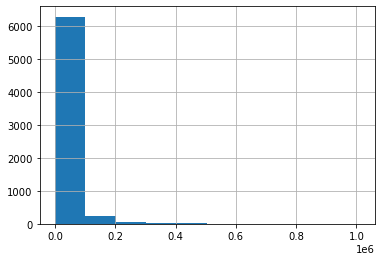

In [7]:
anime.scored_by.hist()

#### Using np.sqrt() using numpy

In [10]:
anime['scored_bySQRT'] = np.sqrt(anime['scored_by'])

##### This positively skewed, so let's tru using log

In [11]:
anime['scored_byLOG'] = np.log(anime['scored_by'])

C:\Users\lzela\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


#### This tells you that there will be infinite values!

### Dealing with Infinite Data

#### (If you try and run the histogram of your log transformed data when you've been given a warning about infinite values, you will get this error: ValueError: range parameter must be finite.)

### Let's drop the na valus by using datasetName.dropna(inplace=True)

In [12]:
anime.dropna(inplace=True)

<AxesSubplot:>

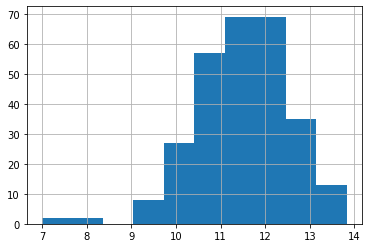

In [13]:
anime.scored_byLOG.hist()

##### That doesn't look too shabby! Not quite normal, but you'll take it.

### Part 2: Transforming Negatively Skewed Data

##### In order to transform negatively skewed data, you will either square or cube your data.

### Squaring the Variable

In [14]:
anime['aired_from_yearSQ'] = anime['aired_from_year']**2

<AxesSubplot:>

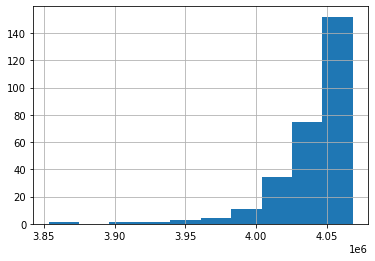

In [15]:
anime.aired_from_yearSQ.hist()

### Cubing the Variable

In [16]:
anime['aired_from_yearCUBE'] = anime['aired_from_year']**3

<AxesSubplot:>

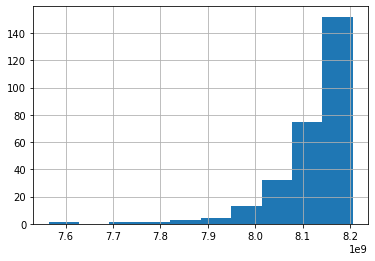

In [17]:
anime.aired_from_yearCUBE.hist()

##### This has not made a lot of impact, but it is slightly better than the original, so you most likely want to use the cubed transformation.

# BoxCox Transformation

##### Just like the Tukey's Ladder of Power Transformations in R, you can transform by power in Python as well. However, the Python version, called boxcox(), has limited functionality. It does not seem to work well for negatively skewed data (so check your results very carefully!), and it does not automatically transform your data, unlike R. It just runs off a power system.

### Import libraries so that BoxCox can work

In [18]:
from scipy import stats
from scipy.stats import boxcox

anime['scored_byLOG1'] = boxcox(anime['scored_by'],0)